<a href="https://colab.research.google.com/github/elio-li/CSCI4964/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

## Task 1 (10 points)

Describe a machine learning problem that you would like to solve using Logistic Regression. Clearly state why Logistic regression is the best choice for solving this problem.

## Task 2 (20 points)

Pick a publicly available dataset that you will use to solve this problem. You must provide a link to the dataset and perform necessary Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a justification of why these were required. For example, if the dataset has lot of missing values, then why did you use a specific technique when handling missing data. This task may include data visualization (Check this link : <https://www.geeksforgeeks.org/top-8-python-libraries-for-data-visualization/>).

Data Set Comes From: [Graduate Admission 2 from Kaggle.com](https://www.kaggle.com/mohansacharya/graduate-admissions) (used ver1.1 for this one)

- In this part I have:
  - renamed all the attribute to a more code-like name such as `GRE Score` into `gre` etc.
  - removed the unnecessary columns such as `Serial No.`
  - split the data set into `x` & `y` for eaiser processing
  - plot the diagrams that shows the relation of each attributes
  - scale values that can be fitted into the model

- Discovery:
  - there're no missing data in this dataset
  - there're no `NULL` data in the dataset as well
  - all data type are numerical

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. load into dataframe
df = pd.read_csv("admission.csv")

In [4]:
# 2. renaming the columns
df = df.rename(columns={'Serial No.': 'id', 'GRE Score': 'gre', 'TOEFL Score': 'toefl',
                        'University Rating': 'rating', 'SOP': 'sop', 'LOR ': 'lor',
                        'CGPA': 'cgpa', 'Research': 'research', 'Chance of Admit ': 'admit'})
df.pop('id')
df.head(5)

,gre,toefl,rating,sop,lor,cgpa,research,admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# 3. drop unecessary columns
y = df.admit.values
x = df.drop(['admit'], axis = 1)

In [6]:
# 4. feature scaling
# https://en.wikipedia.org/wiki/Feature_scaling
x_prime = (x - np.min(x)) / (np.max(x) - np.min(x))
print(x_prime)
x_array = x_prime.to_numpy()
print(x_array)

      gre     toefl  rating    sop    lor      cgpa  research
0    0.94  0.928571    0.75  0.875  0.875  0.913462       1.0
1    0.68  0.535714    0.75  0.750  0.875  0.663462       1.0
2    0.52  0.428571    0.50  0.500  0.625  0.384615       1.0
3    0.64  0.642857    0.50  0.625  0.375  0.599359       1.0
4    0.48  0.392857    0.25  0.250  0.500  0.451923       0.0
..    ...       ...     ...    ...    ...       ...       ...
495  0.84  0.571429    1.00  0.875  0.750  0.711538       1.0
496  0.94  0.892857    1.00  1.000  1.000  0.983974       1.0
497  0.80  1.000000    1.00  0.875  1.000  0.884615       1.0
498  0.44  0.392857    0.75  0.750  1.000  0.522436       0.0
499  0.74  0.750000    0.75  0.875  0.875  0.717949       0.0

[500 rows x 7 columns]
[[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.8   

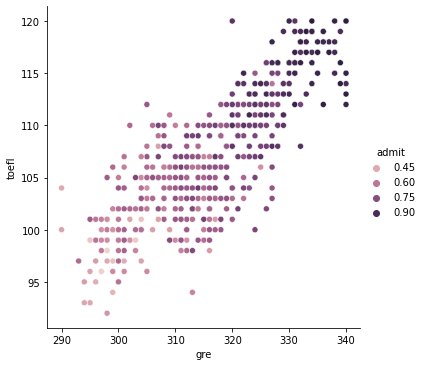

In [7]:
import seaborn as sns
# 5. plot
sns.relplot(x = "gre", y = "toefl", hue = "admit", data = df);

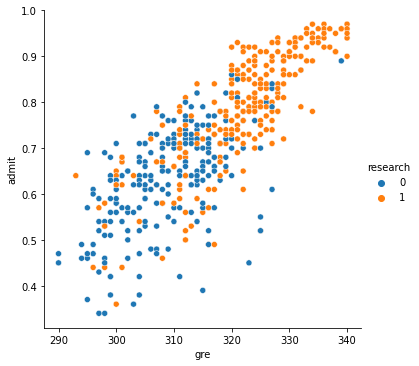

In [8]:
sns.relplot(x = "gre", y = "admit", hue = "research", data = df);

- No surprising, the higher the students' TOEFL and GRE scores are, the higher the chance of getting admitted, also students with research will also very likly get admitted.

## Task 3 (35 points)

Implement, Logistic Regression in this step. Clearly write your cost function and derivatives before implementing gradient descent. Do not use any built-in packages for this step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants of gradient descent in their original form. (Refer to the research paper discussed in class).

In [9]:
"""
Operation Functions(exp, log, dot, etc.)
  - just to get rid of 'np.xxx'
"""

def dot(x, y):
  return np.dot(x, y)

def log(x):
  return np.log(x)

def exp(x):
  return np.exp(x)

def sigmoid(a):
  return 1 / (1 + exp(-a))

In [10]:
"""
Utility Functions
"""

def predict(w, x, b):
  z = dot(w.T, x) + b
  return sigmoid(z)

def loss(y, w, x, b):
  y_hat = predict(w, x, b)
  return - (y * log(y_hat) + (1 - y) * log(1 - y_hat))

def cost(y, w, x, b):
  n = x.shape[1]
  l = loss(y, w, x, b)
  c = 1/n * (np.sum(l))
  return c

def gradient(y, w, x, b):
  n = x.shape[1]
  A = predict(w, x, b)

  dw = 1/n * dot(x, (A-y).T)
  db = 1/n * np.sum(A - y)
  return dw, db

def activation(y, n):
  prediction = np.zeros(n)
  for i in range(y.shape[1]):
    if y[0, i] > 0.5:
      prediction[i] = 1
    else:
      prediction[i] = 0
  return prediction
  

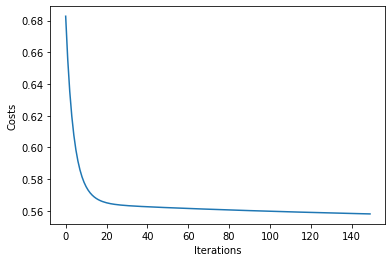

In [27]:
"""
Batch Gradient Descents
"""

def batch(x, y, iter, learnrate):
  # number of examples & features
  m, n = x.shape
  w = np.full((m, 1), 0.01)
  b = 0

  costs = []
  for i in range(iter):
    # get cost & derivatives
    l = cost(y, w, x, b)
    dw, db = gradient(y, w, x, b)
    costs.append(l)

    # update values
    w = w - learnrate * dw
    b = b - learnrate * db

  y_hat = predict(w, x, b)
  prediction = activation(y_hat, n)

  plt.plot(costs)
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
  plt.show()

  return costs

batch_costs = batch(x_array.T, y, 150, 0.15)

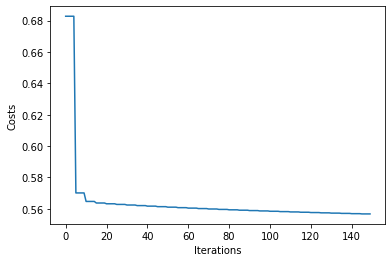

In [28]:
"""
Mini-Batch Gradient Descents
"""

def minibatch(x, y, iter, learnrate):
  # number of examples & features
  m, n = x.shape
  w = np.full((m, 1), 0.01)
  b = 0

  batch_size, points_count = 5, 0

  costs = []
  for i in range(iter):
    # get cost & derivatives
    l = cost(y, w, x, b)
    dw, db = gradient(y, w, x, b)
    costs.append(l)
    points_count += 1

    # update values
    if points_count % batch_size == 0:
      w = w - learnrate * dw
      b = b - learnrate * db
      dw, db = 0, 0

  y_hat = predict(w, x, b)
  prediction = activation(y_hat, n)

  plt.plot(costs)
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
  plt.show()

  return costs

minibatch_costs = minibatch(x_array.T, y, 150, 1)

## Task 4 (35 points)

Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’ gradient descent. Implement both. You may implement these algorithms yourself OR use a package. In your conclusion, compare both optimization techniques/algorithms with respect to the results you achieve. Also compare these results with the original implementation of gradient descent (Task 3 above). Describe why or why not should we use optimization algorithms for the task at hand.

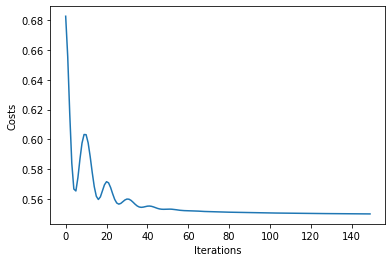

In [30]:
"""
Momentum-Based Gradient Descents
"""

def momentum(x, y, iter, learnrate):
  # number of examples & features
  m, n = x.shape
  w = np.full((m, 1), 0.01)
  b = 0

  prev_v_w, prev_v_b, gamma = 0, 0, 0.9

  costs = []
  for i in range(iter):
    # get cost & derivatives
    l = cost(y, w, x, b)
    dw, db = gradient(y, w, x, b)
    costs.append(l)

    # update values
    v_w = gamma * prev_v_w + learnrate * dw
    v_b = gamma * prev_v_b + learnrate * db
    w = w - v_w
    b = b - v_b
    prev_v_w = v_w
    prev_v_b = v_b

  y_hat = predict(w, x, b)
  prediction = activation(y_hat, n)

  plt.plot(costs)
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
  plt.show()

  return costs

momentum_costs = momentum(x_array.T, y, 150, 0.15)


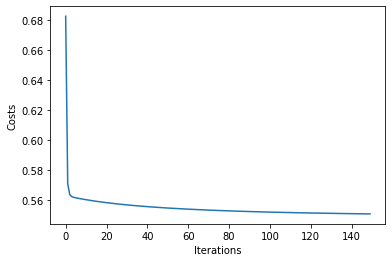

In [31]:
"""
Adagrad
"""

def adagrad(x, y, iter, learnrate):
  # number of examples & features
  m, n = x.shape
  w = np.full((m, 1), 0.01)
  b = 0

  v_w, v_b, eps = 0, 0, 1e-8

  costs = []
  for i in range(iter):
    # get cost & derivatives
    l = cost(y, w, x, b)
    dw, db = gradient(y, w, x, b)
    costs.append(l)

    # update values
    v_w = v_w + dw ** 2
    v_b = v_b + db ** 2
    w = w - (learnrate/np.sqrt(v_w + eps)) * dw
    b = b - (learnrate/np.sqrt(v_b + eps)) * db

  y_hat = predict(w, x, b)
  prediction = activation(y_hat, n)

  plt.plot(costs)
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
  plt.show()

  return costs

adagrad_costs = adagrad(x_array.T, y, 150, 0.15)

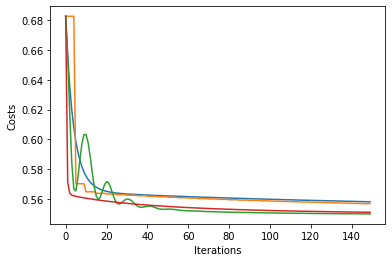

In [41]:
plt.plot(batch_costs)
plt.plot(minibatch_costs)
plt.plot(momentum_costs)
plt.plot(adagrad_costs)
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.show()

From the above graph, we can clearly see that the two optimization algorithms we have implemented yields much lower costs than the two normal versions of gradient descents.

Between Momentum & Adagrad(Green & Red), the cost at the end of the iteration is very similar, however, for the first few iterations(0~40), the fluctuation of Momentum optimizer is very big, we can clearly see 3 hills that are getting smaller one by one, where Adagrad optimizer dropped the cost to the lowest point among all algorithms and it take the least time to achieve that. Thus I believe Adagrad is really good for small iterations, as for big iterations both optimizers' result don't look really different.